<h3 align=middle style="line-height:500%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Project Three, Question Two
</font>
</h3>

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part 1 :
</font>
</h3>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
train = pd.read_csv(r"D:\Sharif University of Tech\Data Sience Boot Camp\Project\Third Phaze\Second Problem\Data\train_data.csv")
test = pd.read_csv(r"D:\Sharif University of Tech\Data Sience Boot Camp\Project\Third Phaze\Second Problem\Data\test_data.csv")
titles = pd.read_csv(r"D:\Sharif University of Tech\Data Sience Boot Camp\Project\Third Phaze\Second Problem\Data\title_brand.csv")

C:\Users\Acer\AppData\Local\Temp\ipykernel_9516\3590191414.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r"D:\Sharif University of Tech\Data Sience Boot Camp\Project\Third Phaze\Second Problem\Data\train_data.csv")


In [3]:
train.isna().sum()

overall                0
vote              647476
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             348331
reviewerName         227
reviewText             0
summary               76
unixReviewTime         0
dtype: int64

In [4]:
test.isna().sum()

vote              15067
verified              0
reviewTime            0
reviewerID            0
asin                  0
style              8496
reviewerName          4
reviewText            0
summary               2
unixReviewTime        0
dtype: int64

We need to handle the Nan values.

"vote" nans are where there has been no helpful vote for the review, therefore we will fill the nan values in this column with 0s.

"reviewerName" is not that important in our sentiment analysis and the number is limited so we will get rid of their rows.

"summary" is pretty important and because of the number of nans compared to the whole dataset, we will drop the rows that don't have any value in this column.

"style" won't affect the result much (or at least shouldn't), and thence we will drop the respective column.

We also have a time column so probably there is no need for UnixTime.

we would do it this way :

In [5]:
train.drop(columns=['style', 'unixReviewTime'], inplace=True)
test.drop(columns=['style', 'unixReviewTime'], inplace=True)

train["vote"].fillna(0, inplace=True)
test["vote"].fillna(0, inplace=True)

In [6]:
train.isna().sum(), train.shape

(overall           0
 vote              0
 verified          0
 reviewTime        0
 reviewerID        0
 asin              0
 reviewerName    227
 reviewText        0
 summary          76
 dtype: int64,
 (838944, 9))

In [7]:
test.isna().sum(), test.shape

(vote            0
 verified        0
 reviewTime      0
 reviewerID      0
 asin            0
 reviewerName    4
 reviewText      0
 summary         2
 dtype: int64,
 (20000, 8))

Now that we have handled nans, we can check our datatypes and other things:

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   overall       838944 non-null  int64 
 1   vote          838944 non-null  object
 2   verified      838944 non-null  bool  
 3   reviewTime    838944 non-null  object
 4   reviewerID    838944 non-null  object
 5   asin          838944 non-null  object
 6   reviewerName  838717 non-null  object
 7   reviewText    838944 non-null  object
 8   summary       838868 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 52.0+ MB


In [9]:
train

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,2,0,False,2016-11-11,A2OSUEZJIN7BI,0511189877,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn
1,5,0,True,2016-06-06,A2NETQRG6JHIG7,0511189877,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?
2,4,0,True,2016-03-10,A12JHGROAX49G7,0511189877,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.
3,5,0,True,2016-01-14,A1KV65E2TMMG6F,0511189877,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote
4,5,0,True,2016-10-20,A280POPEWI0NSA,0594459451,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord
...,...,...,...,...,...,...,...,...,...
838939,5,0,True,2017-07-25,A1OOVLE2KZ6KGA,B01HJCN1EI,Puddzee,These are my favorite charging cords for a few...,Worth the price.
838940,1,0,True,2017-04-04,A77K1B31UAQ29,B01HJCN1EI,addictedtoreading,"Update....after 2 months of gentle use, cable ...",UPDATE...BREAKS AND SLOW CHARGING
838941,3,0,True,2017-07-08,A2SVXUVUAWUDK2,B01HJH42KU,Andrew,These are okay. The connection becomes very if...,Hope this makes sense. You'd understand if you...
838942,5,2.0,True,2016-12-01,A2HUZO7MQAY5I2,B01HJH40WU,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.


In [10]:
train[['verified']] = train[['verified']].replace([False, True], [0, 1])
test[['verified']] = test[['verified']].replace([False, True], [0, 1])

train['vote'] = pd.to_numeric(train['vote'], errors='coerce').fillna(0)
test['vote'] = pd.to_numeric(test['vote'], errors='coerce').fillna(0)

train["reviewTime"] = pd.to_datetime(train["reviewTime"])
test["reviewTime"] = pd.to_datetime(test["reviewTime"])

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   overall       838944 non-null  int64         
 1   vote          838944 non-null  float64       
 2   verified      838944 non-null  int64         
 3   reviewTime    838944 non-null  datetime64[ns]
 4   reviewerID    838944 non-null  object        
 5   asin          838944 non-null  object        
 6   reviewerName  838717 non-null  object        
 7   reviewText    838944 non-null  object        
 8   summary       838868 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 57.6+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   vote          20000 non-null  float64       
 1   verified      20000 non-null  int64         
 2   reviewTime    20000 non-null  datetime64[ns]
 3   reviewerID    20000 non-null  object        
 4   asin          20000 non-null  object        
 5   reviewerName  19996 non-null  object        
 6   reviewText    20000 non-null  object        
 7   summary       19998 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [13]:
train.isna().sum()

overall           0
vote              0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName    227
reviewText        0
summary          76
dtype: int64

In [14]:
test.isna().sum()

vote            0
verified        0
reviewTime      0
reviewerID      0
asin            0
reviewerName    4
reviewText      0
summary         2
dtype: int64

Finally we will go for the questions:

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 1 :
</font>
</h3>

Checking for imbalancement:

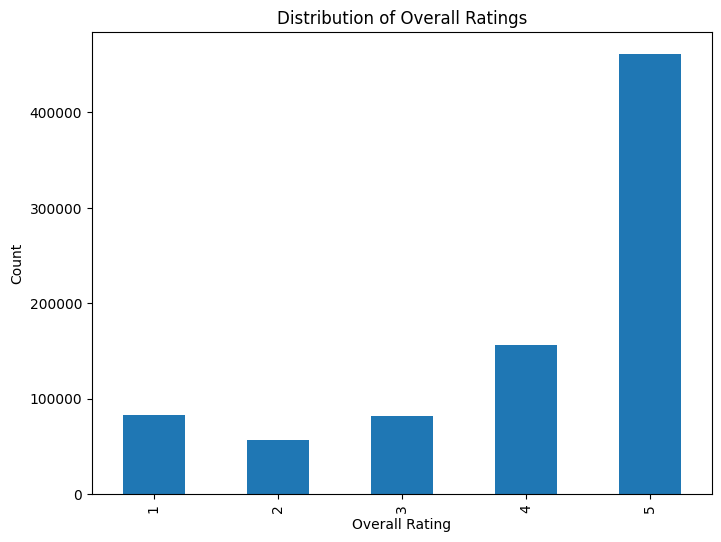

In [15]:
plt.figure(figsize=(8, 6))
train['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

Adding some mathematical backbone to our implentation:

In [16]:
rating_distribution = train['overall'].value_counts().sort_index()
is_balanced = rating_distribution.min() / rating_distribution.max() >= 0.7
print("Is the dataset balanced?", is_balanced)

Is the dataset balanced? False


As it is shown, we need to handle the imbalancement.

We need to make sure that no overfitting is being made, so if we have got overfitting in our final results this is a checkpoint for sure!

We will use the IMBlearn random oversampler for the purpose:

In [17]:
train["overall"].value_counts()

overall
5    461485
4    156514
1     82950
3     81239
2     56756
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy={1: 82950, 2: 56756, 3: 81239, 4: 149999, 5: 149999}, random_state=78)
oversampler = RandomOverSampler(sampling_strategy={1: 150000, 2: 150000, 3: 150000, 4: 150000, 5: 150000}, random_state=78)

X_resampledo, y_resampledo = undersampler.fit_resample(train.drop(columns=["overall"]), train['overall'])
X_resampled, y_resampled = oversampler.fit_resample(X_resampledo, y_resampledo)

In [19]:
balanced_distribution = y_resampled.value_counts().sort_index()
print("Balanced Rating Distribution:")
print(balanced_distribution)

Balanced Rating Distribution:
overall
1    150000
2    150000
3    150000
4    150000
5    150000
Name: count, dtype: int64


<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 2 :
</font>
</h3>


After the imbalancement handling, we will go for positive, neutral, and negative wordclouds:

In [20]:
nltk.download('stopwords')
positive_reviews = train[train['overall'].isin([4, 5])]
neutral_reviews = train[train['overall'] == 3]
negative_reviews = train[train['overall'].isin([1, 2])]
positive_text = " ".join(positive_reviews['reviewText'])
neutral_text = " ".join(neutral_reviews['reviewText'])
negative_text = " ".join(negative_reviews['reviewText'])
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
wordcloud_positive = WordCloud(stopwords=stop_words, background_color='white').generate(positive_text)
wordcloud_neutral = WordCloud(stopwords=stop_words, background_color='white').generate(neutral_text)
wordcloud_negative = WordCloud(stopwords=stop_words, background_color='white').generate(negative_text)

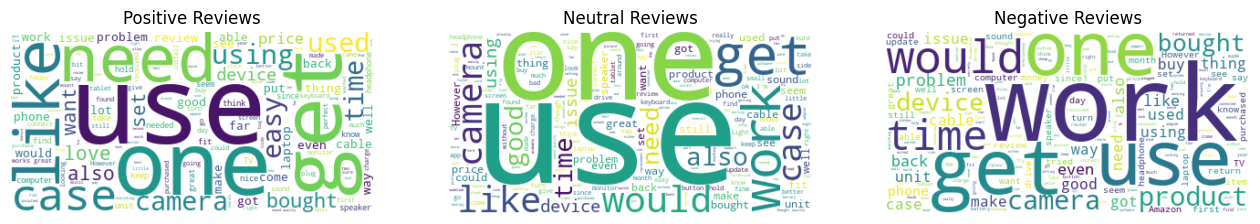

In [22]:
plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis("off")

plt.subplot(132)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Reviews')
plt.axis("off")

plt.subplot(133)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis("off")

plt.show()

As it is shown, we still have some words that are not meant to be there and they are in every class so we will try to delete them too in order to get a better result:

In [23]:
stop_words.add('one')
stop_words.add('get')
stop_words.add('camera')
stop_words.add('need')
stop_words.add('product')
stop_words.add('work')
stop_words.add('time')
stop_words.add('use')
stop_words.add('device')
stop_words.add('would')
stop_words.add('also')
stop_words.add('bought')
stop_words.add('case')
stop_words.add('like')

In [24]:
wordcloud_positive = WordCloud(stopwords=stop_words, background_color='white').generate(positive_text)
wordcloud_neutral = WordCloud(stopwords=stop_words, background_color='white').generate(neutral_text)
wordcloud_negative = WordCloud(stopwords=stop_words, background_color='white').generate(negative_text)

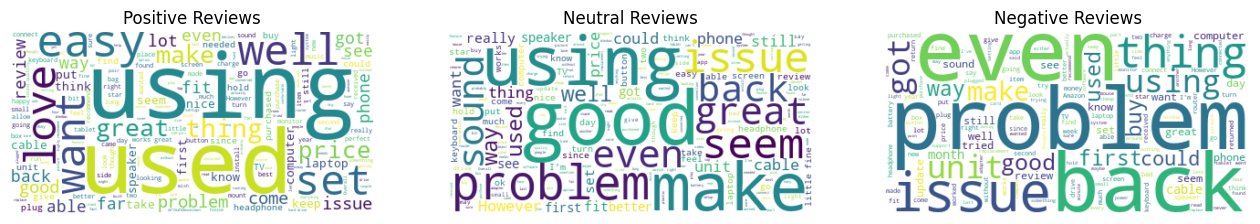

In [25]:
plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis("off")

plt.subplot(132)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Reviews')
plt.axis("off")

plt.subplot(133)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis("off")

plt.show()

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 3 :
</font>
</h3>


Now we will find the top 10 useful users:

In [26]:
top_reviewers = train.groupby('reviewerID')['vote'].sum().reset_index()
top_reviewers = top_reviewers.sort_values(by='vote', ascending=False)
top_10_reviewers = top_reviewers.head(10)
top_10_reviewer_info = top_10_reviewers.merge(train[['reviewerID', 'reviewerName']], on='reviewerID')
top_10_reviewer_info = top_10_reviewer_info.drop_duplicates(subset='reviewerName')
t10df = pd.DataFrame(top_10_reviewer_info[['reviewerName', 'vote']])
print("Top 10 Reviewers with Most Votes:")
t10df

Top 10 Reviewers with Most Votes:


,reviewerName,vote
0,Benson Leung,4572.0
29,Obi Wan,1608.0
58,Chris Winter,1352.0
62,Mayra S.,1342.0
81,VermontGuy,1337.0
88,Michael,1230.0
220,PhotoGraphics,1209.0
288,Nicholas,1188.0
311,NLee the Engineer,1103.0
342,David H,1045.0


<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 4 :
</font>
</h3>


Original one :

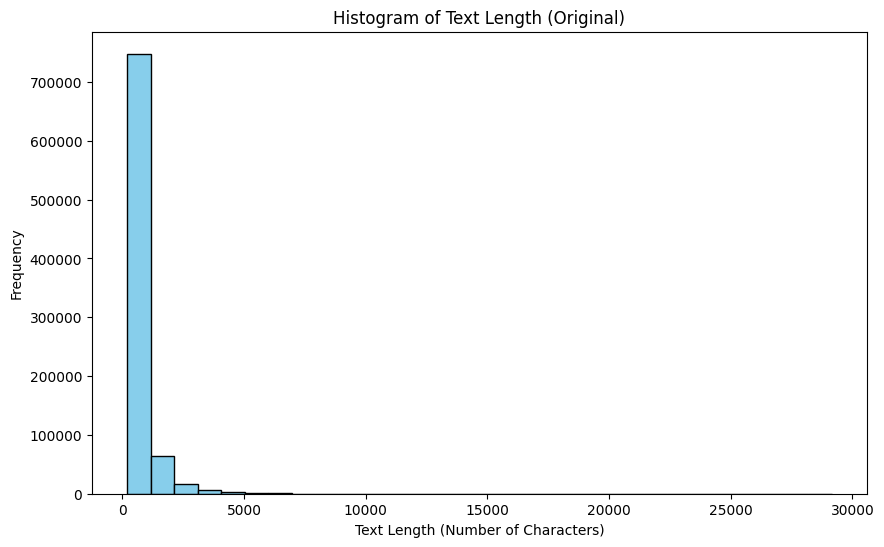

In [27]:
train['text_length'] = train['reviewText'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(train['text_length'], bins=30, color='skyblue', edgecolor="black")
plt.title('Histogram of Text Length (Original)')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

Let's find the filter boundaries with the IQR method:

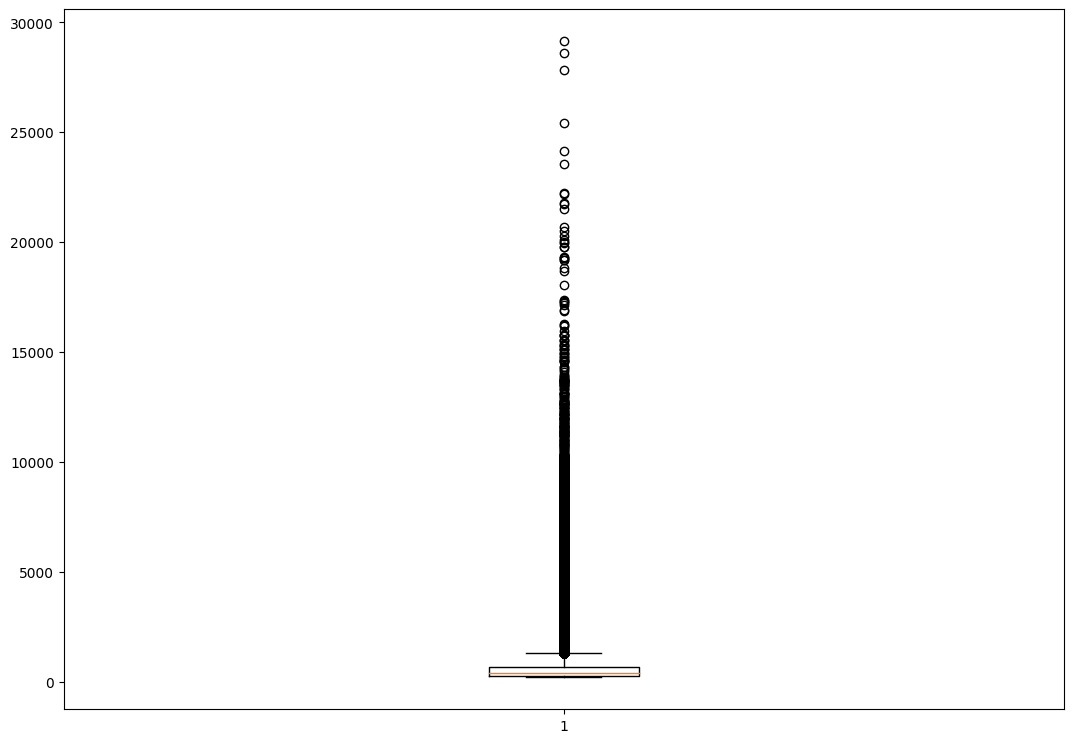

In [28]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot((train["text_length"]))
plt.show()

In [29]:
m = np.mean(train["text_length"])
q3, q1 = np.percentile(train["text_length"], [75 ,25])
iqr = q3 - q1
lower = m - 1.5*iqr
upper = m + 1.5*iqr
(lower, upper)

(-5.312615621543273, 1254.6873843784567)

We don't have a -5 characters long word, so we will consider the lower bound as 0.

Now for the filtered one :

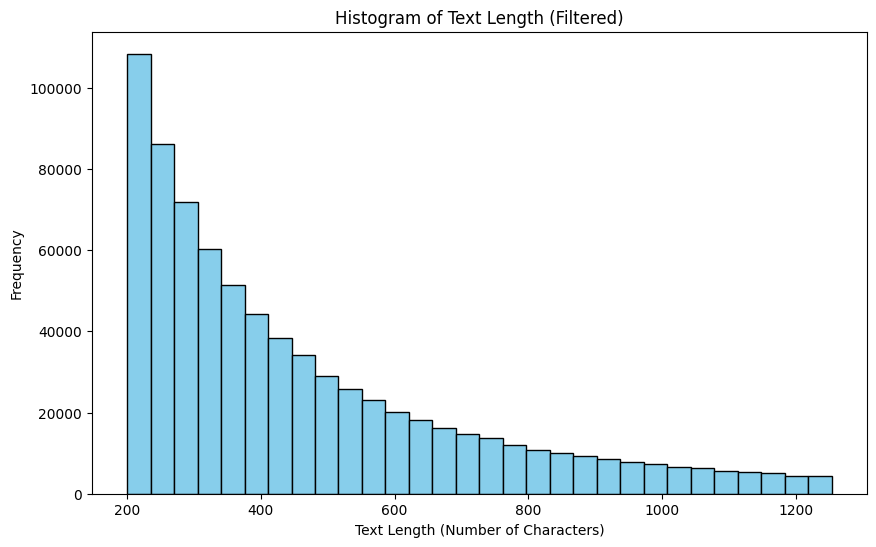

In [30]:
filtered_data = train[(train['text_length'] >= 0) & (train['text_length'] <= upper)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['text_length'], bins=30, color='skyblue', edgecolor="black")
plt.title('Histogram of Text Length (Filtered)')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

Based on the analysis of the histogram of text lengths, it seems that setting a constraint on the text length during modeling could be beneficial. 

The filtered histogram with a minimum of 50 characters and a maximum of 1000 characters resulted in a smoother distribution of text lengths.

Therefore, it is advisable to impose constraints on the text length during modeling.

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 5 :
</font>
</h3>


In [31]:
five_star_reviews = train[train['overall'] == 5]

top_products = five_star_reviews.groupby('asin')['overall'].count().reset_index()
top_products = top_products.rename(columns={'overall': 'num_5_star_reviews'})
top_products = top_products.sort_values(by='num_5_star_reviews', ascending=False)
top_products = top_products.merge(titles[['asin', 'title', 'brand']], on='asin', how='left')

In [32]:
top_10_products = top_products.head(10)
t10pdf = pd.DataFrame(top_10_products[['brand', 'title', 'num_5_star_reviews']])
print("10 most five stars rated products:")
t10pdf

10 most five stars rated products:


,brand,title,num_5_star_reviews
0,Cambridge Soundworks,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,1163
1,NETGEAR,NETGEAR N300 WiFi Range Extender (EX2700),659
2,Roku,Roku Streaming Stick (3600R) - HD Streaming Pl...,600
3,StarTech,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,598
4,Logitech,Logitech M570 Wireless Trackball Mouse &ndash;...,552
5,Samsung,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...,529
6,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,471
7,VideoSecu,VideoSecu ML531BE TV Wall Mount for Most 27&qu...,448
8,"Arlo Technologies, Inc",Arlo - Wireless Home Security Camera System | ...,433
9,Samsung,Samsung 850 EVO 250GB 2.5-Inch SATA III Intern...,431


<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 6 :
</font>
</h3>


In [33]:
train.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'text_length'],
      dtype='object')

In [34]:
titles.columns

Index(['asin', 'title', 'brand'], dtype='object')

In [35]:
merged_data = pd.merge(train, titles, on='asin')

brand_stats = merged_data.groupby('brand').agg({'overall': ['count', 'mean']})
brand_stats.columns = ['num_reviews', 'average_rating']
top_10_brands = brand_stats.sort_values(by='num_reviews', ascending=False).head(10)

In [36]:
top_10_brands

,num_reviews,average_rating
brand,,
Logitech,17066,3.954061
Samsung,15409,3.941268
AmazonBasics,13213,4.201468
Sony,12436,3.938726
Asus,11928,3.855550
Anker,9860,4.244320
TP-LINK,9773,3.928681
SanDisk,8400,3.958810
Sabrent,7320,4.028005


<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part 2 :
</font>
</h3>


Preprocessing Text Data:

We need to preprocess the 'reviewText' column to ensure consistency. This includes lowercasing, removing punctuation, and tokenization. 

We will use the NLTK library for tokenization.


Searching for Relevant Keywords:

We will search for relevant keywords related to warranties and guarantees, including synonyms and common typos. We'll create a list of such keywords.
Filtering Relevant Reviews:

Using the list of keywords, we'll filter the reviews that contain at least one of these keywords.
Calculating Average Ratings:

We'll group the filtered reviews by 'asin' (product identifier) and calculate the average 'overall' rating for each product.

Let's implement this step by step:

In [37]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [39]:
keywords = ['warranty', 'guarantee', 'warrantee', 'guarentee', 'warantee']

filtered_reviews = []
for keyword in keywords:
    keyword_filter = train['reviewText'].str.contains(keyword)
    filtered_reviews.append(train[keyword_filter])

filtered_reviews_df = pd.concat(filtered_reviews)
average_ratings = filtered_reviews_df.groupby('asin').agg(
    overall_mean=('overall', 'mean'),
    num_reviews=('overall', 'count')
).reset_index()

average_ratings = pd.merge(average_ratings, titles, on='asin', how='left')

In [40]:
average_ratings

,asin,overall_mean,num_reviews,title,brand
0,6541654530,1.0,1,Canon EF 24-105mm f/4L IS USM Lens Bundle Inte...,Canon
1,9800466657,5.0,1,SanDisk EXTREME PRO 64GB (95MB/s) MicroSDXC wo...,SanDisk
2,B000001OM4,4.0,2,Maxell CD-330 CD-to-Cassette Audio Adapter (19...,Maxell
3,B00000J4EY,3.0,1,"Kensington SmartSockets 6-Outlet, 16-Foot Cord...",Kensington
4,B00000J4EY,3.0,1,"Kensington SmartSockets 6-Outlet, 16-Foot Cord...",Kensington
...,...,...,...,...,...
9650,B01HIA63ZA,5.0,2,Corsair Neutron XTi Series SSD 240GB (CSSD-N24...,Corsair
9651,B01HIQYWU2,3.0,1,Brenthaven BX2 Edge Case | 360-Degree Protecti...,Brenthaven
9652,B01HIS30OY,3.0,1,Logitech CREATE Backlit Keyboard Case with Sma...,Logitech
9653,B01HIURQWE,5.0,1,Dmax Armor for LG G Pad X 10.1 Screen Protecto...,Dmax Armor


Or we can be a little more creative and :

In [41]:
import pandas as pd
import spacy


nlp = spacy.load('en_core_web_sm')
keywords = ['warranty', 'guarantee', 'warrantee', 'guarentee', 'warantee']

def extract_keywords(text):
    doc = nlp(text)
    return [token.text for token in doc if token.text in keywords]

train['extracted_keywords'] = train['reviewText'].apply(extract_keywords)

filtered_reviews_df = train[train['extracted_keywords'].apply(len) > 0]
average_ratings = filtered_reviews_df.groupby('asin').agg(
    overall_mean=('overall', 'mean'),
    num_reviews=('overall', 'count')
).reset_index()

average_ratings_nlp = pd.merge(average_ratings, titles, on='asin', how='left')

In [42]:
average_ratings_nlp

We define a list of relevant keywords related to warranties. 
These keywords include variations that people might use to refer to warranties.

The extract_keywords function is defined to extract keywords from the reviewText column using spaCy. 
It takes a text input, tokenizes it using spaCy, and returns a list of keywords found in the text.

We add a new column, extracted_keywords, to the review_data DataFrame. 
This column will contain the keywords extracted from each review.

We create a new DataFrame, filtered_reviews_df, by filtering the reviews. 
It selects only the rows where the extracted_keywords column contains at least one keyword. 
This way, we keep only the reviews that mention warranties or related terms.

We continue with the same process as before to calculate the average ratings for products. 
The code groups the filtered reviews by product (asin), calculates the mean of the overall ratings for each product, and counts the number of reviews for that product.

To provide additional information about the products, we merge the average_ratings DataFrame with the titles_data DataFrame based on the asin column. 
This allows us to include the product titles and brands in the result.

Finally, the code prints the extended average_ratings DataFrame, which now includes the average ratings, the number of reviews, product titles, and brands for products that had reviews mentioning warranties.

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part 3 :
</font>
</h3>


In [43]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

In [44]:
class SentimentAnalysisModel(nn.Module):
    def __init__(self, bert_model):
        super(SentimentAnalysisModel, self).__init__()
        self.bert = bert_model
        self.fc = nn.Linear(768, 1)

    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids, attention_mask)
        pooled_output = output['last_hidden_state'][:, 0, :]
        sentiment_score = self.fc(pooled_output)
        return sentiment_score

In [45]:
train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SentimentAnalysisModel(bert_model).to(device)
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.MSELoss()

OR :

In [47]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

train_data_1 = train_data.merge(titles, on='asin', how='left')

train_data_1['overall'] = train_data_1['overall'] - 1

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
class SentimentDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.encodings = tokenizer(data['reviewText'].tolist(), truncation=True, padding=True, max_length=max_length)
        self.labels = data['overall'].tolist()

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

In [49]:
max_length = 128
batch_size = 32

train_dataset = SentimentDataset(train_data_1, tokenizer, max_length)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 3

In [ ]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Average Loss: {avg_loss:.4f}")

In [ ]:
model.save_pretrained("sentiment_model")